In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [13]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

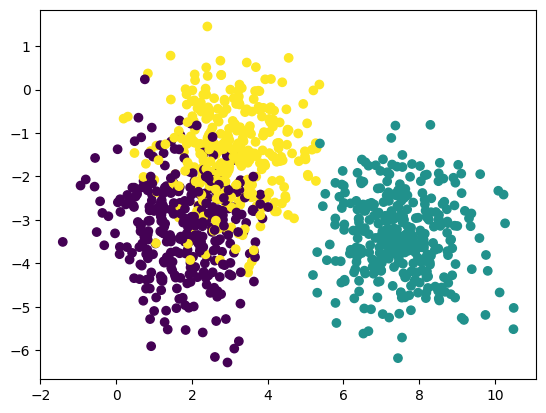

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [21]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++')
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

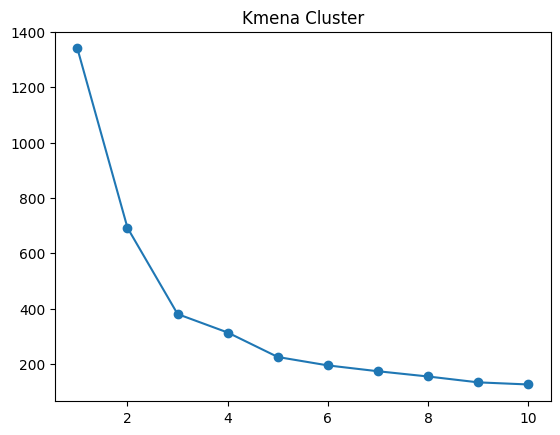

In [29]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Kmena Cluster')
plt.show()

In [30]:
# Validating the K values
# kneelocator
# Silhoutee

In [32]:
from kneed import KneeLocator

In [33]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [34]:
kl.elbow

3

In [35]:
# Silhoutee score
from sklearn.metrics import silhouette_score

In [36]:
silhouette = [] 
for k in range(2,11):
    kmean = KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    score = silhouette_score(X_train,kmean.labels_)
    silhouette.append(score)

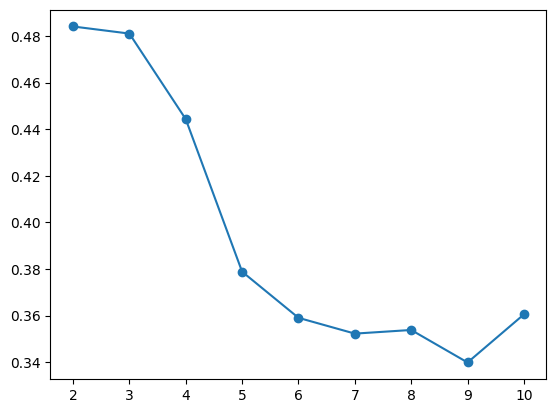

In [37]:
plt.plot(range(2,11),silhouette,marker = "o")